# <font color='Blue'>Using Neutron Diffraction Data to Determine the Magnetic Signal Function's Parameters (Non-Linear Curve Fit)</font> 

#### K. Rattanasudsai

##  <font color='Blue'>Introduction</font> 

Our task is to determine the Magnetic Signal's function of temperature's parameters; by using a non-linear curve fit model and integration methods to determine more refined coefficients to fit for the data given. The results to fit are from a neutron scattering experiment collected at ISIS, the UK’s national neutron source. The material corresponding to these data is collected from a manganese(II) compound, methylammonium manganese(II) formate (CH<sub>3</sub>NH<sub>3</sub>Mn(HCO<sub>2</sub>)<sub>3</sub>). 

###  <font color='Blue'>Neutron scattering:</font>
Neutron interacts with normal matter through the weak nuclear forces (Nuclear Scattering), which is good for demonstrating the principles of quantum mechanics. More often, neutron scatterings are used for analysing the structure of matter because they can penetrate deeply into most crystals. They’re especially popular in bimolecular research because the neutron beams do not damage the organic molecules understudy. Also, they are able to detect the hydrogen in the molecules, which is useful in understanding the molecule’s function. 
Moreover, neutrons can interact through magnetic moment (Magnetic Scattering). This is caused by the free electrons around the nuleus. Typically, the intensity of the magnetic contribution to the diffraction peaks will decrease towards higher angles $\theta$. Although neutrons’ net overall charge is zero, it still has an inner structure composed of quarks which has an attribute spin ½ associated with it. These features combined to give the neutron a magnetic dipole moment. We can adjust its spin in a magnetic field; hence due to their acute sensitivity scattering neutrons are used to study the microscopic structure of crystals.  

<img src="http://www.globalsino.com/EM/image1/3882.gif" width="400" height="400" />

__[Schematic-of-Braggs-law](http://www.globalsino.com/EM/image1/3882.gif)__

A figure showing Bragg's Law. $\lambda$ =wavelength in Angstroms ($Å$), $d$ (d-spacing) = interatomic spacing Angstroms ($Å$), $\theta$ = diffraction angle in degrees


Since all matter and light has a wave-like nature, we can consider neutrons as both particles and waves using the de Broglie wavelength $\lambda = h/p\$. The fact that we see diffraction patterns suggests the size of the spacing d and the wavelength of our neutrons are similar. Hence we see an interference pattern. Here we have used the quantum mechanics property of subatomic particles to determine the wavelength of neutrons as a wave-particle duality phenomena. 

## <font color='Blue'>Methods</font> 

- To investigate the data we would need to import the .txt files and open them. In total the 8 text files contain $N\times2$ arrays. The first column of the array is our “$d$-spacing” (x-axis) and the second column is the diffracted intensity $I$ (y-axis). Each file refers to different temperatures which is embedded in the name of the data, `data_TTTTT.txt`, where `TTTTT` represents the temperature at which the data were collected.  
- Then plot the temperatures (x-axis) against integrated values of the data (y-axis) to understand the behaviour of neutron as a function of temperature. 
- To determine a suitable fit we need to derive a model for the magnetic signal as a function of temperature. It contains the parameters which are especially desired from the data. The magnetisation $M$ as a function of temperature $T$ with four parameters: the amplitude $A$ of the magnetic signal, the magnetic transition temperature $T_0$, the *critical exponent* $\beta$, and a constant background $B$. Then devise a suitable initial guess to make the 'guess fit' as appropriate as possible to the integrated data points. 
- After the initial guess is found to be sufficiently close to the curve we need a better model to fit the data using the built-in fitting function `curve_fit`, from the `scipy.optimize` module and the Magnetic Signal model. 
- Then experiment with changing the integration range to find a more suitable fit for the data. 

##  <font color='Blue'>1. Loading and plotting the data</font> 

In [1]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
%matplotlib notebook
import glob                               #https://pymotw.com/2/glob/

- To import the data, the files need to be opened and added to a list of arrays for later uses.
- Use the `glob` module to find the paths to each files
- The list of temperatures is found through looping over the file names and removing the characters of the directory and file type.

In [2]:
a=glob.glob('project2_data/*.txt')      #finds all the .txt files in a directory and returns both path and file name
a.sort()                          
b=0
filename=[]                             #list of names of the files in directory
for i in a:
    ne=a[b][14:-5]                      #removes characters from each elements
    filename.append(ne)
    b+=1

c=0    
temperature=[]                          #list of temperatures in strings
for i in filename:
    p=filename[c][5:]
    temperature.append(p)
    c+=1

- Plot the graph of d-spacing $(Å)$ against Diffraction Intensity $(I)$ using a for loop over the arrays in the .txt files.

<IPython.core.display.Javascript object>


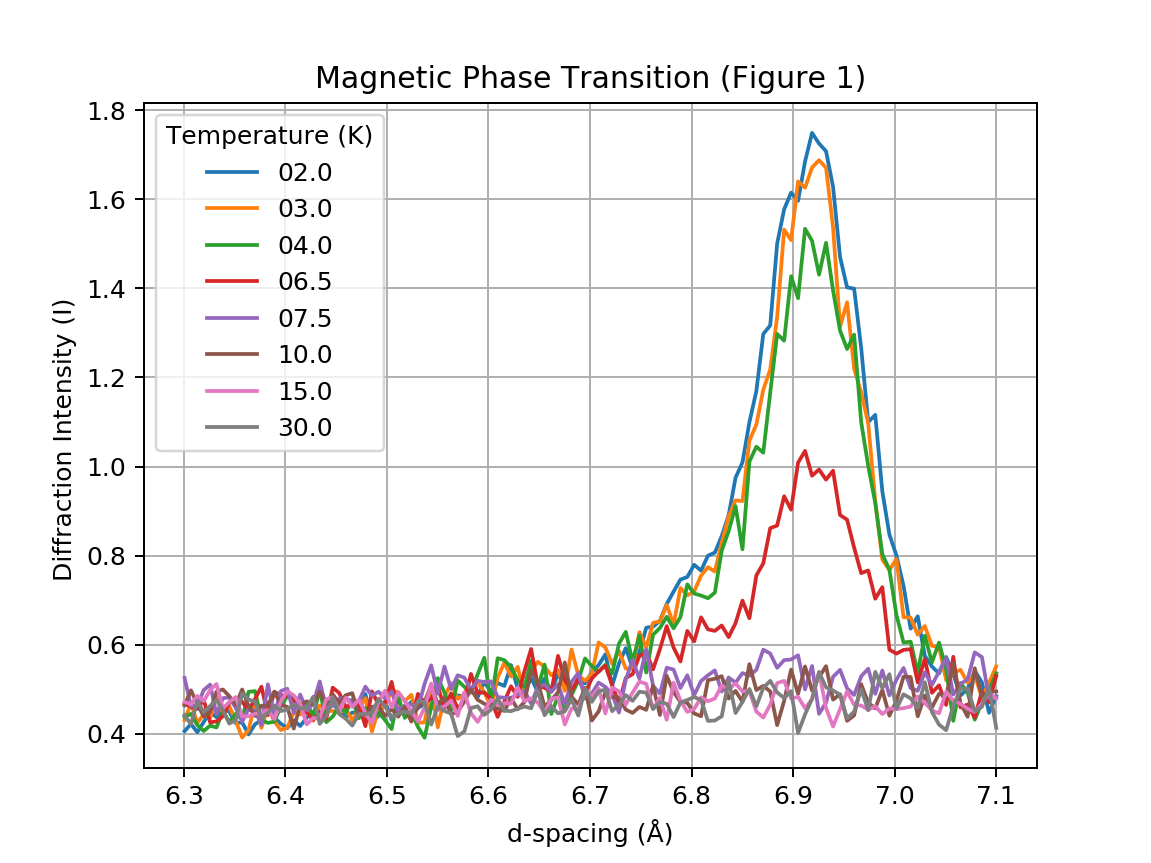

Text(0.5,1,'Magnetic Phase Transition (Figure 1)')

In [3]:
%matplotlib notebook
u=0
data=[]                                               #list of arrays in the .txt files 
for i in a:              
    op=np.loadtxt(i)                                  #opens txt file
    data.append(op)             
    plt.plot(op[:,0],op[:,1],label=temperature[u])    #plot arrays in the data 
    plt.plot()
    u+=1
plt.grid()
plt.legend(title='Temperature (K)')
plt.xlabel('d-spacing (Å)')
plt.ylabel('Diffraction Intensity (I) ')
plt.title('Magnetic Phase Transition (Figure 1)')

- Using Bragg's law $\lambda = 2d\sin\theta$ we can deduce from the graph the wavelength of the scattered neutron, the diffraction angle and the lattice spacing d. The characteristic interference peak occurs at around $\mathrm{6.8Å}$ and $\mathrm{7Å}$ shows that constructive interference (waves add up) occurred and that the Bragg's law $\lambda = 2d\sin\theta\$ maybe used to describe the diffraction pattern. Whereas the majority of the waves are incoherent (waves interfere destructively) are the background noise in the data. 

- From figure 1 we should expect the intensity of the magnetic peak at $0K$ to be around $I = 1.7$, that is the same as $2K$. The trend of the peaks seems to suggests that the exponential increase in amplitude occurs at lower temperatures which is around $6.5K$ down to $2K$ (Using the Legend).  

## <font color='Blue'>2. Integrating the data </font>  

#### <font color='Blue'>Integrate the Magnetic Diffraction Intensity and plot it as a function of Temperature. (Using the `numpy.trapz` module)</font>  

<IPython.core.display.Javascript object>


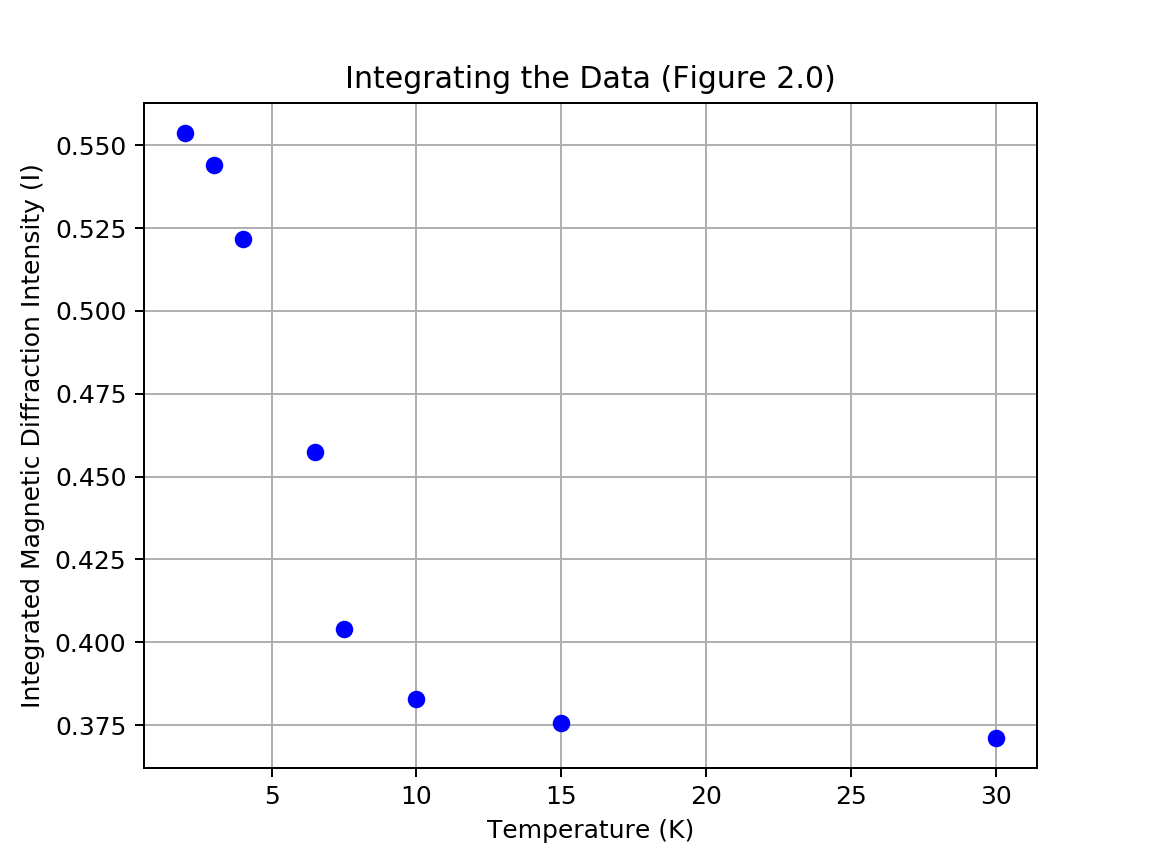

Text(0.5,1,'Integrating the Data (Figure 2.0)')

In [4]:
#Using the Trapz funciton to integrate each data set and plot against Temperatures respectively
%matplotlib notebook
integrated=[]                                    #List of integrated data, each element refers to the integrated values of each graph
for i in data:
    integral=np.trapz(i[:,1],i[:,0])             #integrate wrt to y element and x element respectively of each array
                                                 #integrate each data set and append to a list 'integrated'
    integrated.append(integral)

temps=[2.0,3.0,4.0,6.5,7.5,10.0,15.0,30.0]       #Temperatures understudy

plt.plot(temps,integrated,'bo')
plt.grid()
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')
plt.title('Integrating the Data (Figure 2.0)')

#### <font color='Blue'>Using the `trapezoid` function to integrate each data set and plot it as a function of temperature</font> 

In [5]:
#Using the Trapezoid function to integrate each data sets and plot against Temperatures respectively
def trapezoid(x, y):                               #array of data points x and y values 
    size=x[1:]-x[:-1]                             #specify and make the steps into even number of data points(120), as the steps in d-spacing is odd(121)
    p=np.hstack((size,np.array([0.])))            #np.hstack() stack arrays in sequence horizontally (column wise), wheare as .stack() join a sequence of arrays along a new axis
    n=np.hstack((np.array([0.]),size))
    
    h=(n+p)/2
    integral = sum(y*h) 
    return integral 

<IPython.core.display.Javascript object>


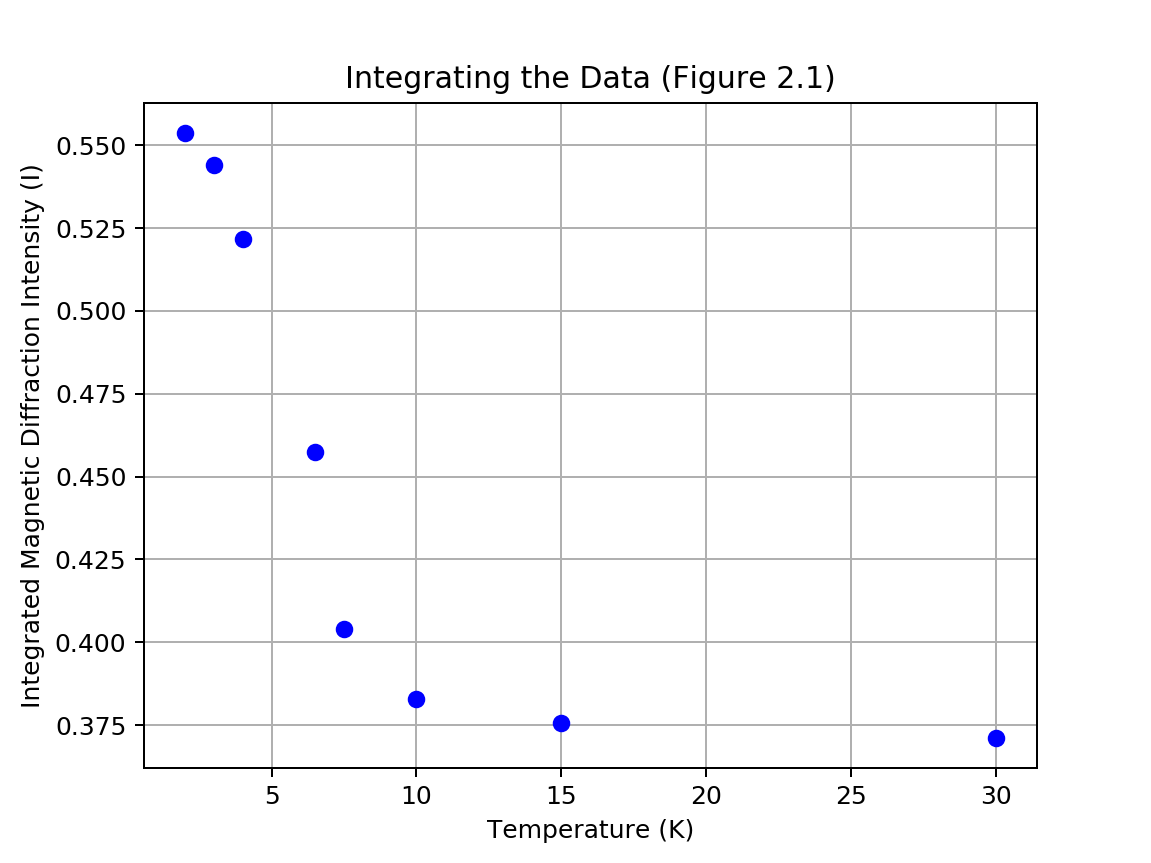

In [6]:
%matplotlib notebook
integrated1=[]                                     #List of integrated data, each element refers to the integrated values of each graph

for i in data:
    integral=[trapezoid(i[:,0],i[:,1])]            #where 0 and 1 referers to the 'x' and 'y' element of each array
    integrated1.append(integral)                   #List of integrated values
temps=[2.0,3.0,4.0,6.5,7.5,10.0,15.0,30.0]         #Temperatures understudy

plt.plot(temps,integrated1,'bo')
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')
plt.title('Integrating the Data (Figure 2.1)')
plt.grid()

- Plotting the 'Integrated data' as a function of temperature shows that the intensity decreases exponentially as the temperature is raised. 
- The lowest temperature observed around $1K$ shows that neutrons have most diffraction intensity, which in turn corresponds to higher magnitude of $d$-spacing and hence to a smaller angle of diffraction $\theta$. As $\lambda = 2d\sin\theta$; so $d$ is inversely proportional to the angle $\theta$.
- The majority of data points that are most common and above the background noise is between between $0 K$ and $15 K$. This also suggests where the coherent interference range is most frequent. 

#### <font color='Blue'>Experiment with using the Linear Least Square Model to fit the data</font> 

In [7]:
def coefficient_matrix(x,k):
    v=np.zeros((k+1)**2).reshape(k+1,k+1)
    n=-1
    for i in range (k+1):
        n+=1
        for j in range (k+1):
            v[i,j]=sum(x**(j+n))
    return v
x=np.array(temps)
y=np.array(integrated)

def constant_matrix(x,y,k):
    v=np.zeros(k+1)
    for i in range (k+1):
        v[i]=sum(x**i * y)
    return v
constant_matrix(x,y,3)
C=coefficient_matrix(x,3)
Co=constant_matrix(x,y,3)

quadratic_coefficients = np.linalg.solve(C,Co)
print(quadratic_coefficients)

[ 6.56067777e-01 -4.72885903e-02  2.49708794e-03 -4.12317529e-05]


In [8]:
def y_fitted(x, coefficients):
    return sum([c*x**i for i, c in enumerate(coefficients)])
c=y_fitted(x,quadratic_coefficients)

<IPython.core.display.Javascript object>


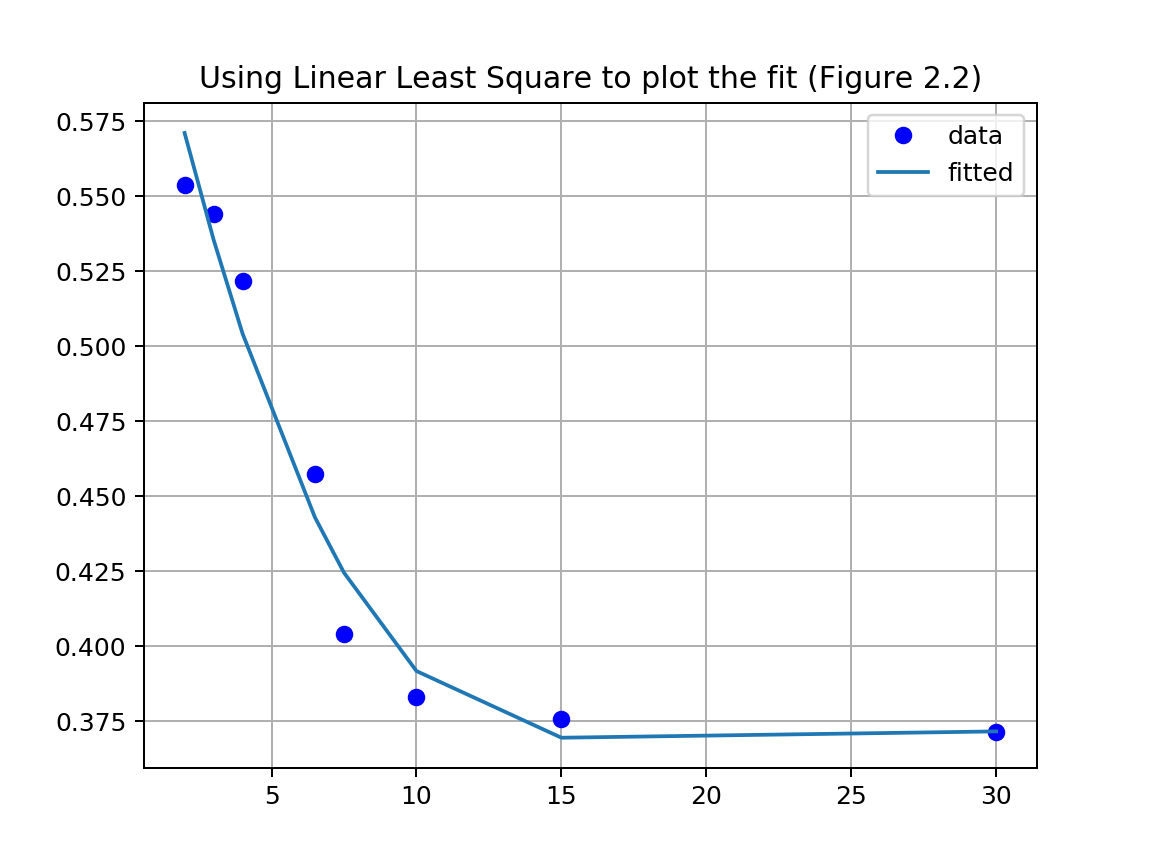

Text(0.5,1,'Using Linear Least Square to plot the fit (Figure 2.2)')

In [9]:
%matplotlib notebook
plt.plot(x,y,'bo',label='data')
plt.plot(x,c,label='fitted')
# plt.plot(x,abs(c-y),label='difference')
plt.legend()
plt.grid()
plt.title('Using Linear Least Square to plot the fit (Figure 2.2)')

- This clearly shows that this method is not a good fit for the data, and hence to fit the data we need a non-linear curve

In [10]:
def chi_squared(x, y, coefficients):
    b=len(coefficients)
    p=y_fitted(x, coefficients)
    xr=sum((p-y)**2)
    return xr/b

In [11]:
chi_squared(x, y, quadratic_coefficients)

0.00035636084073787923

- For model assessment, small value of reduced chi-squared means the impact of the noise in the data is large and can only be used with linear models, where the number of degrees of freedom can be estimated. For non-linear models the number of degrees of freedom is unknown.  

##  <font color='Blue'>3. Plot a Non- Linear Fit using a model for the Magnetic Signal as a function of Temperature</font>

The functional form to which we fit these data is

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$

Magnetisation $M$ as a function of temperature $T$ with four parameters: the amplitude $A$ of the magnetic signal, the magnetic transition temperature $T_0$, the *critical exponent* $\beta$, and a constant background $B$.

####  <font color='Blue'>The `Magnetic Signal` Function</font>

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


<IPython.core.display.Javascript object>


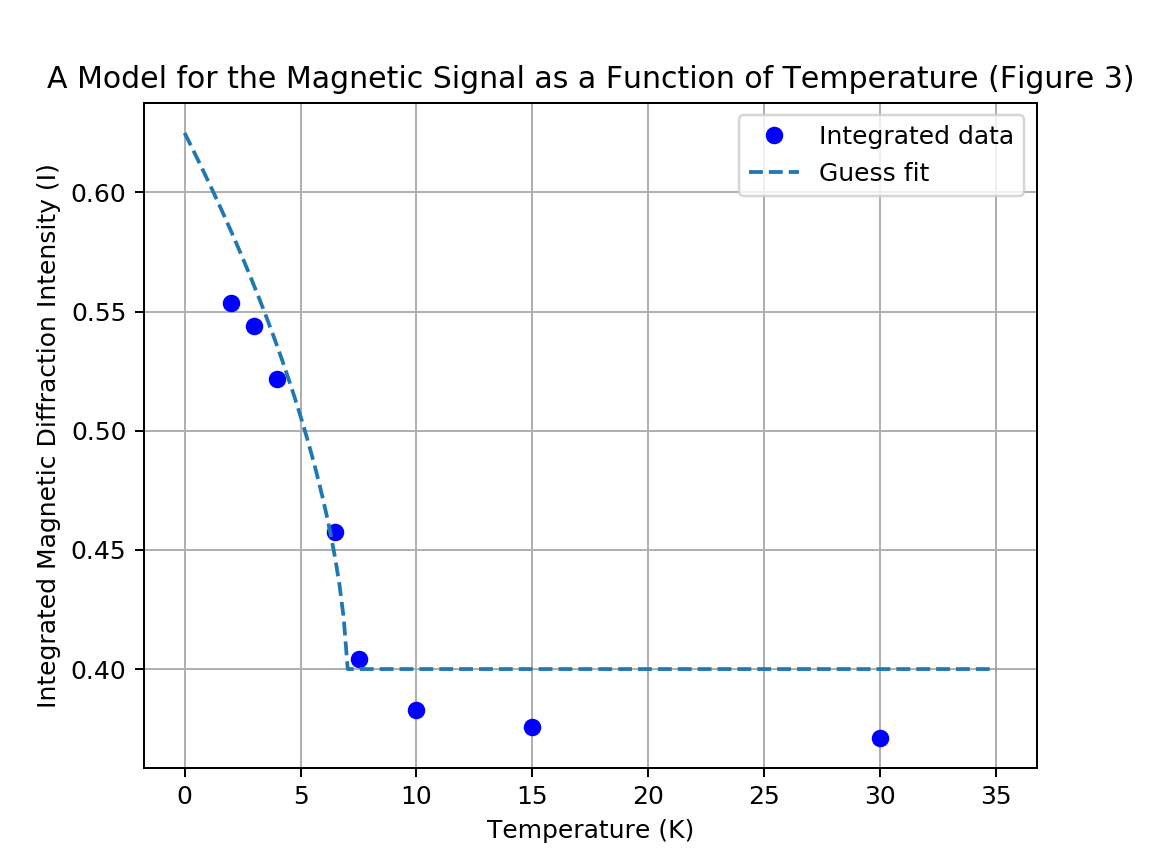

In [12]:
#Define the Magnetic Signal function and use the initial guesses to fit the data
%matplotlib notebook
import matplotlib.pyplot as plt
from numpy import linspace
def mag_signal(T,A,T0,beta,B):                      #T= Temperature,A=amplitude, T0=magnetic transition Temperature, β=critical exponent, B=constant background   
    a=np.where(T<T0 ,(A*(T0-T)**beta)+B,B )        #if the condition given is true then the first value is returned otherwise the second is returned
    return a                                     

x=linspace(0,35,200)                               #Return evenly spaced numbers over a specified interval
y=mag_signal(x,0.07,7,0.6,0.4)                     #B is where the function plateued, B is very sensitive to small changes shifts the graph vertically

plt.plot(temps,integrated,'bo',label='Integrated data') 
plt.plot(x,y,'--',label='Guess fit')
plt.grid()
plt.xlabel('Temperature (K)')
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.title('A Model for the Magnetic Signal as a Function of Temperature (Figure 3)')
plt.legend()

- Plot using the model $M(T)$ with coefficients $A$=0.07 , $T_0$=7, $\beta$=0.6, and $B$=0.4
- Although the 'Guess fit' seems close to the actual data plotted, this is a result of many trial and errors. Hence a model that can find a suitable starting guess will be useful for determining the fit and the coefficients. The constant Background $B$ term essentially determines where the function cuts off and becomes constant with respect to the Temperature. Increasing the Amplitude $A$ will increase the intensity values $I$.
- Increasing the value $T_0$ slightly (e.g. $T_0$ = $10$), will shift the 'guess fit' curve to the right; while a significant change say $T_0$ = 100 will make the graph straight with no curve property which is not suitable to fit the data.   

##  <font color='Blue'>4. Better Fit for the Data </font>

#### <font color='Blue'>Using the built-in fitting function `curve_fit`, from the `scipy.optimize` module to fit the model to the data</font>

(array([0.08589865, 7.19885018, 0.42068556, 0.38349813]), array([[ 3.84192456e-03, -9.14269380e-02, -2.41570035e-02,
        -2.97125503e-05],
       [-9.14269380e-02,  2.27463660e+00,  5.73147740e-01,
        -2.98622265e-04],
       [-2.41570035e-02,  5.73147740e-01,  1.53464235e-01,
         8.00142961e-05],
       [-2.97125503e-05, -2.98622265e-04,  8.00142961e-05,
         4.09527672e-05]]))


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


<IPython.core.display.Javascript object>


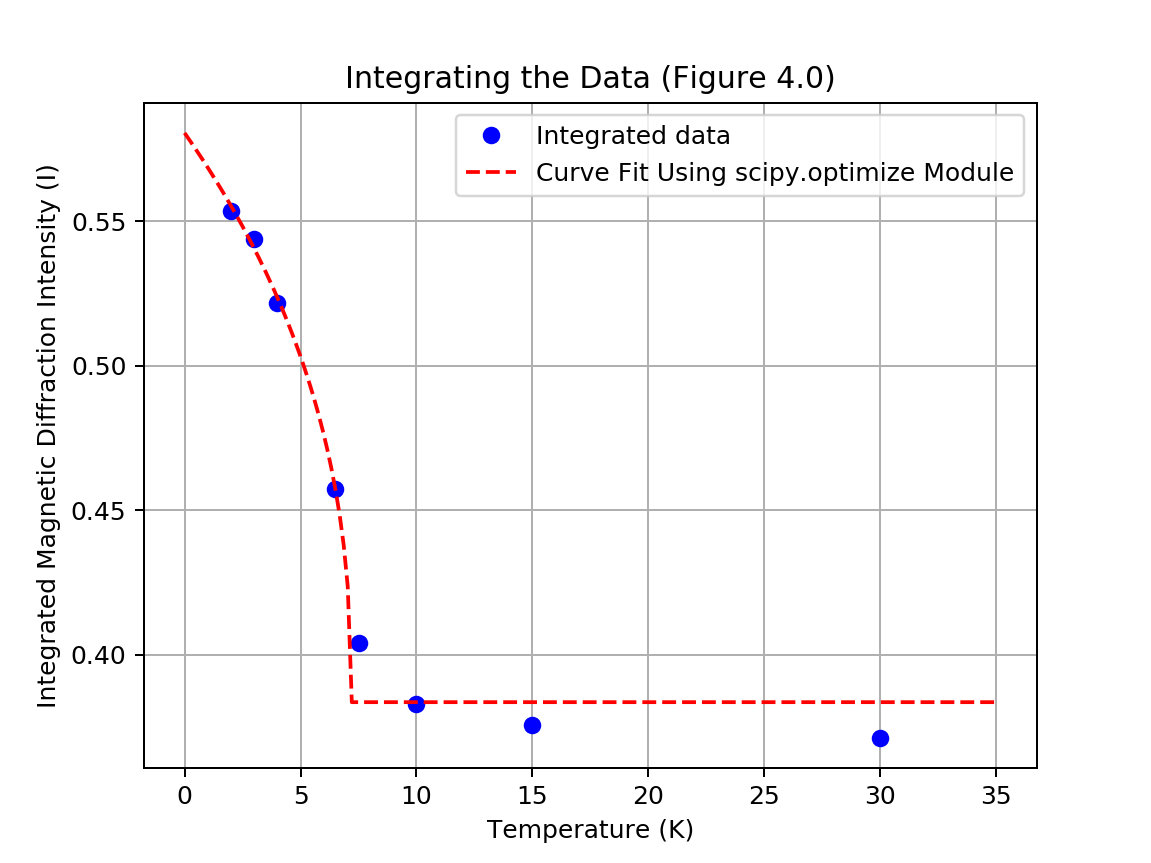

In [13]:
#Using the scipy.optimize module to fit he data
%matplotlib notebook
from scipy import optimize
x=linspace(0,35,200)                                                           #Return evenly spaced numbers over a specified interval
curvefit= optimize.curve_fit(mag_signal,temps,integrated,(0.07,8,0.6,0.37))    #gives the refined values of the data
print(curvefit)

#y values from using the curvefit to refine the values
y=mag_signal(x,0.08589865, 7.19885018, 0.42068556, 0.38349813)    #x=equally spaced data points,A=amplitude, T0=magnetic transition Temperature, β=critical exponent, B=constant background 
plt.plot(temps,integrated,'bo',label='Integrated data')
plt.plot(x,y,'r--',label='Curve Fit Using scipy.optimize Module')

plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')
plt.title('Integrating the Data (Figure 4.0)')
plt.legend()
plt.grid()

- Here the non-linear 'Curve fit' provides a much closer fit to the 'Integrated data'. This is possible through determining a more refined value $A$=0.08589865 , $T_0$=7.19885018, $\beta$=0.42068556, and $B$=0.38349813. Nevertheless, the cut off point at the bottom of the curve at the Constant Background of $B$=0.38349813 is not suitable for this type of result since it significantly missed the two points where the sharp feature of the 'curve fit' occurs. 

#### <font color='Blue'>Fit the model to the data by defining a suitable `g` function relating to the `Magnetic Signal Model` </font> 

In [14]:
def g(param, data):
    """Represents the vector function g derived from a Model for magnetic signal for nonlinear least-squares fitting."""
    A, T0, beta, bkg = param   
    T, m = data
    g1 = np.sum((m - mag_signal(T, *param))*np.where(T < T0, (T0 - T)**beta, 0))             #derivative of M(T) wrt A
    g2 = np.sum((m - mag_signal(T, *param))*np.where(T < T0, beta*A*(T0-T)**(beta-1), 0))     #derivative of M(T) wrt T0
    g3 = np.sum((m - mag_signal(T, *param))*np.where(T < T0, A*(T0-T)**beta*np.log(T0-T), 0))  #derivative of M(T) wrt beta
    g4 = np.sum((m - mag_signal(T, *param)))                                                   #derivative of M(T) wrt B
    return g1, g2, g3, g4

In [15]:
def CD(f, x0, h):
    """Returns the derivative of f at x0 evaluated using the central difference algorithm with step size h."""
    return (f(x0 + h/2) - f(x0 - h/2))/np.linalg.norm(h)
def jacobian(g, param, data):
    """Returns the Jacobian matrix of g evaluated at param, given observed data."""
    p = np.array(param)
    delta = 1e-6
    N = len(param)
    jac = np.zeros((N,N))               # Start with an empty matrix of the right size.
    for i in range(N):                  # We want to calculate df_i/dp_j for all i and j, so need two loops.
        def g_i(x):                     # Define an appropriate one-dimensional function f_i:
            return g(x, data)[i]
        for j in range(N):
            dv = np.zeros(N)            # Set up a step of delta in the appropriate direction:
            dv[j] = delta
            jac[i,j] = CD(g_i, p, dv)
    return jac
def nD_Newton_step(g, p, data):
    return p-np.linalg.solve(jacobian(g,p,data),g(p,data))

#### <font color='Blue'>The function `p` returns the coefficients for the Magnetic Function </font> 

In [16]:
def p(a,b,c,d,Integrated,temps):     
    p0 = np.array((a,b,c,d))
    eps = 1e-7
    converged = False
    while not converged:
        p1 = nD_Newton_step(g, p0, (temps,Integrated))  #data : x= temperatures, y=intensity integrated
        if np.linalg.norm(p1 - p0) < eps:
            converged = True
            print('magnetic signal coefficients =',p1)
        else:
            p0 = p1
    return p1

In [17]:
new=p(0.07,7,0.6,0.4,integrated,temps)

magnetic signal coefficients = [0.07750173 7.61870465 0.48834062 0.37659476]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


#### <font color='Blue'> Then plot the curve fit using the coefficients found from the functions `g` ,`CD`, `jacobian`,`nd_Newton_step`, and `p` . </font> 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


<IPython.core.display.Javascript object>


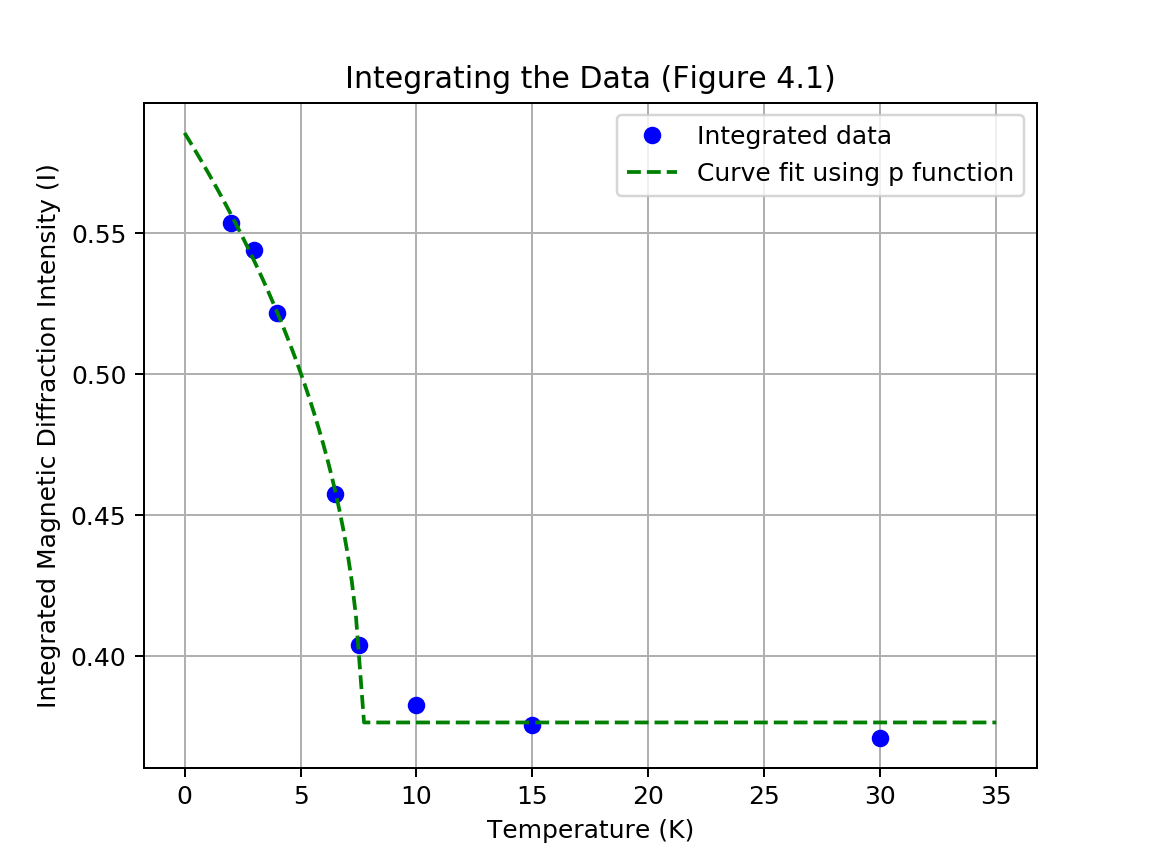

In [18]:
%matplotlib notebook
x=linspace(0,35,200)   
y=mag_signal(x,*new)     #need asterisk to refer to the parameters found above 
plt.plot(temps,integrated,'bo',label='Integrated data')       
plt.plot(x,y,'g--',label='Curve fit using p function')
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')
plt.title('Integrating the Data (Figure 4.1)')
plt.legend()
plt.grid()

- The `p` function is clearly a better fit for our data than the `curve_fit`, from the `scipy.optimize` module.
- We can see quite clearly from the curve fit line that the data points are better fitted, especially at the lower temperature end of the graph compared to figure 4.0, by using the magnetic signal coefficients found from the g function. Where we used function $M(T)$ with $A$=0.07750173 , $T_0$=7.61870465, $\beta$=0.48834062, and $B$=0.37659476
- Nevertheless we're still missing the point at 10$K$ where the cut off occurs. 

#### <font color='Blue'> Removing the first 50 elements from the data and plot the curve fit </font> 

By observing figure 1, we can see a lot of noise in the data. Thus if we remove the noise and integrate just between where the diffraction peaks occurs ($6.6Å$ - $7.1Å$) we would expect a difference in the fit. 

In [19]:
integ =[]                           #list of integrated values of each graphs
for i in range(8):
    x=data[i][:,0]
    x=x[50:]                        #removing the first 50 x-values
    y=data[i][:,1]                  #removing the first 50 y-values
    y=y[50:]
    c=trapezoid(x,y)
    integ.append(c)
# plt.plot(temps,inter,'o')

magnetic signal coefficients = [0.08114924 7.29454815 0.46383459 0.23351271]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


<IPython.core.display.Javascript object>


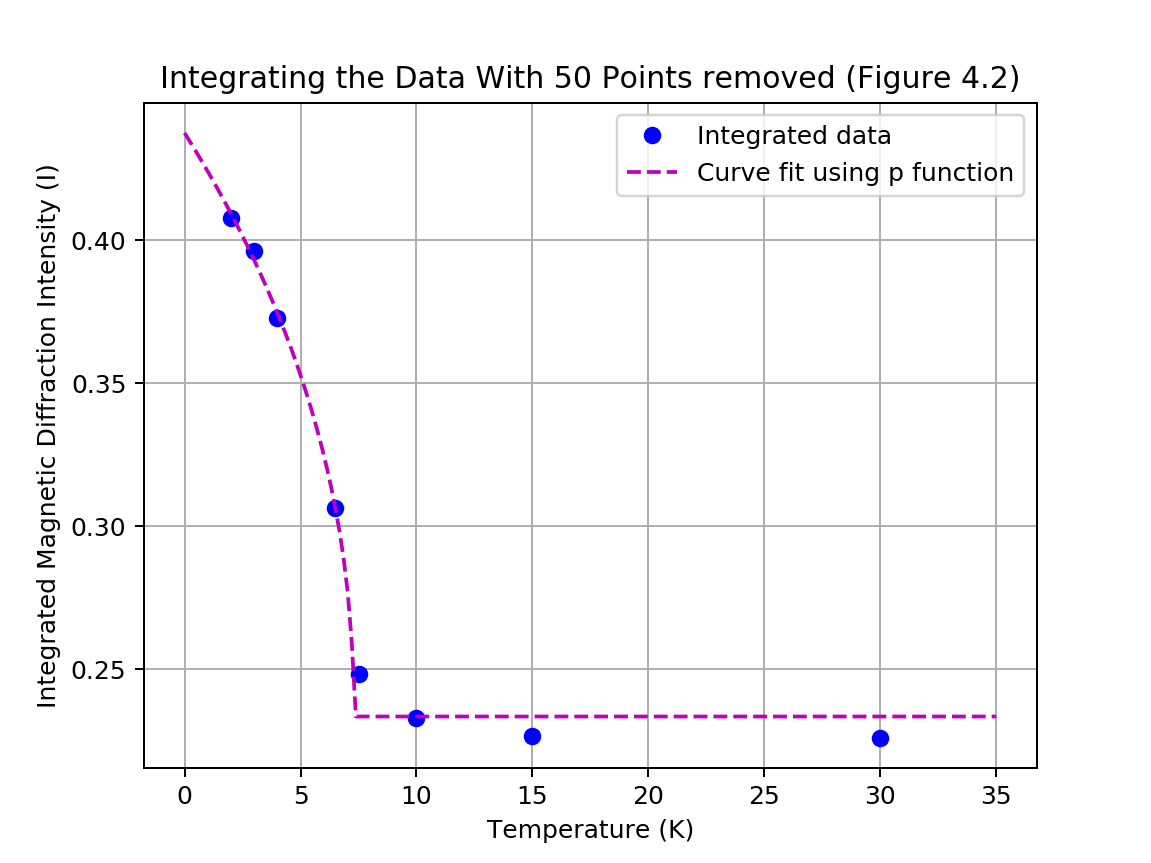

In [20]:
new2=p(0.07,7,0.6,0.22,integ,temps)       #need to change the second last input for the new integrated graph (this corresponds to the y lower limit)

%matplotlib notebook
x=linspace(0,35,200)   
y=mag_signal(x,*new2)               #need asterisk to refer to the parameters found above 

plt.plot(temps,integ,'bo',label='Integrated data')       
plt.plot(x,y,'m--',label='Curve fit using p function')
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')
plt.title('Integrating the Data With 50 Points removed (Figure 4.2)')
plt.legend()
plt.grid()

- This time the point at 10$K$ is now fitted better than figure 4.1 but the points at 15$K$ and 30$K$ is now deviated instead. This indicates that some of the background diffractions are important to the fit of the data. 

####   <font color='Blue'> Deleting the last point from the integrated data</font> 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


magnetic signal coefficients = [0.0753501  7.60567761 0.49672064 0.37929317]


<IPython.core.display.Javascript object>


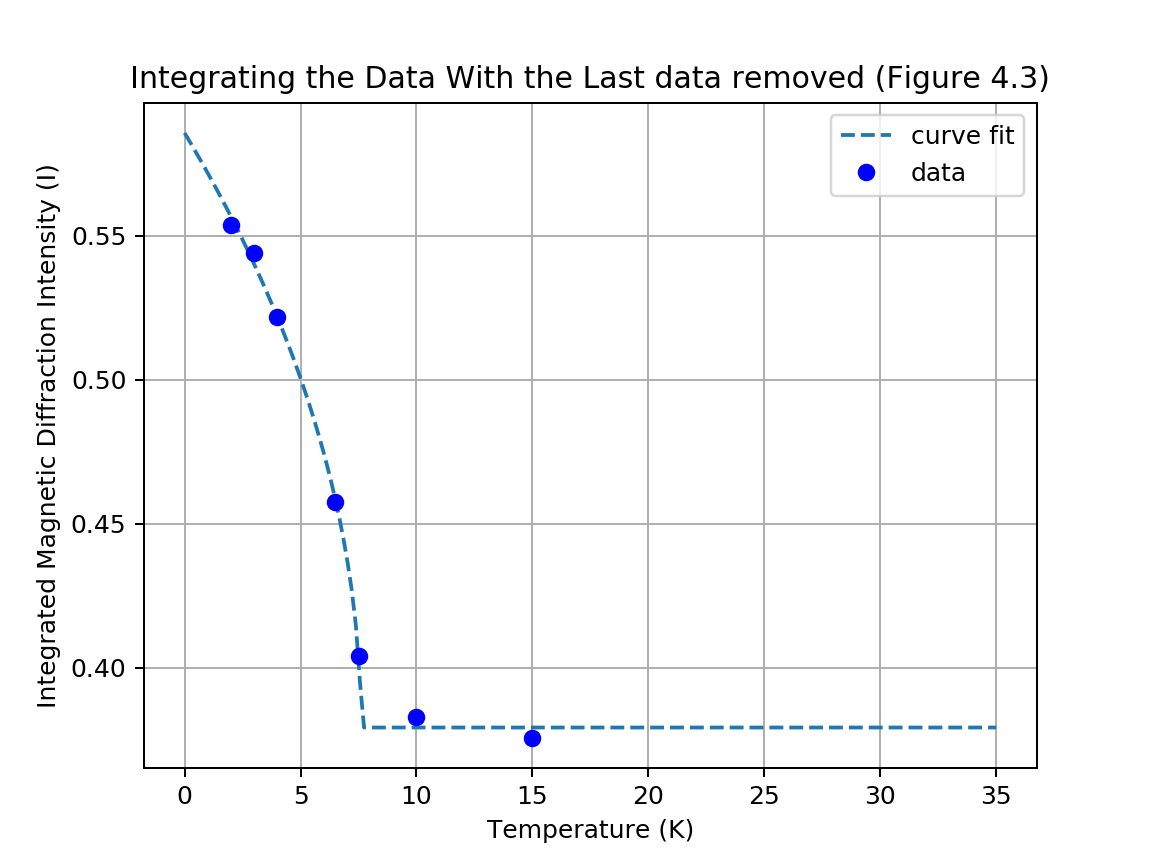

Text(0.5,0,'Temperature (K)')

In [21]:
%matplotlib notebook
removed=integrated[:-1]

new3=p(0.1,7,0.6,0.2,removed,temps[:-1])
x=linspace(0,35,200)   
y=mag_signal(x,*new3)
plt.plot(x,y,'--',label='curve fit')

plt.plot(temps[:-1],removed, 'bo', label='data')
plt.legend()
plt.grid()
plt.title('Integrating the Data With the Last data removed (Figure 4.3)')
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')

- The fitted curve shows a slight improve fit when compared to figure 4.1, where the last data is now removed. This shifts the cut off Background data up from $B$ = 0.37659476 to $B$ = 0.37929317. Thus this gives the point at $10K$ a better fit than before.  

####   <font color='Blue'> Deleting the 6th point from the integrated data</font> 

magnetic signal coefficients = [0.08576064 7.19746623 0.42105796 0.38368823]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


<IPython.core.display.Javascript object>


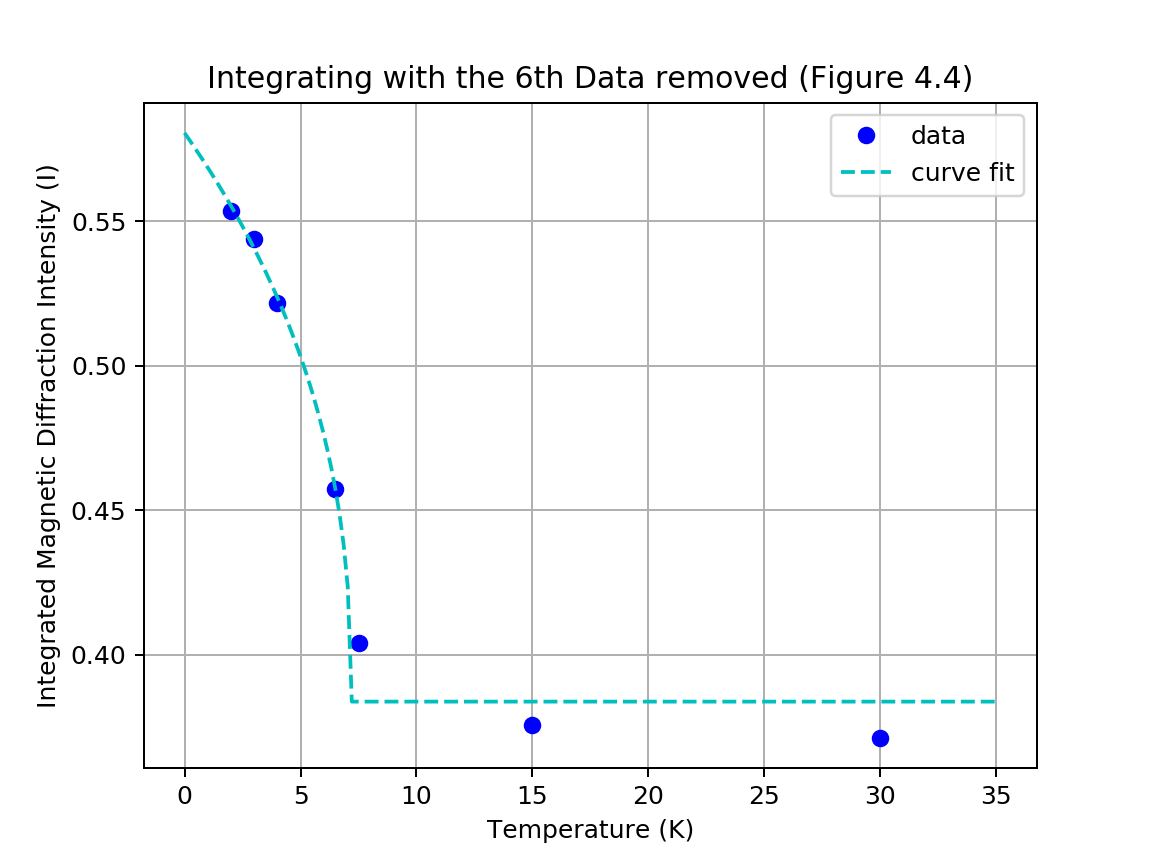

Text(0.5,0,'Temperature (K)')

In [22]:
%matplotlib notebook
c= integrated [0:5] +integrated[6:8]
new_temps= temps [0:5] +temps[6:8]

new4=p(0.09,7,0.6,0.3,c,new_temps)

x=linspace(0,35,200)   
y=mag_signal(x,*new4)

plt.plot(new_temps,c, 'bo', label='data')
plt.plot(x,y,'c--',label='curve fit')
plt.legend()
plt.grid()
plt.title('Integrating with the 6th Data removed (Figure 4.4)')
plt.ylabel('Integrated Magnetic Diffraction Intensity (I)')
plt.xlabel('Temperature (K)')

- Deleting the 6th point at $10K$ didn't seem to have an effect on figure 4.4 as it didn't shift down the y-axis as much as deleting the last point at $30K$.

##  <font color='Blue'>5. Discussion and further exploration </font> 

## <font color='Blue'>Results and Discussion</font>
The initial guess is very sensitive to the fit of the curve. Our initial guesses of $A$=0.07, $T_0$=7, $\beta$=0.6, and $B$=0.4 shows (figure 3) a good fit for integrated data as a function of temperature. However, it lacks the refined properties of Figure 4.0 when we change the value of beta to $\beta$=0.42068556  and the constant background scattering $B$ = 0.38349813. However, by using the Magnetic Signal Coefficients = [$A$=0.07750173 , $T_0$=7.61870465, $\beta$=0.48834062, and $B$=0.37659476] to plot we can see the curve fit (Figure 4.1) is even better than figure 4.0. By modelling the curve as a Magnetic Signal function we were able to find an improved representation of the curve. Moreover, by removing the background noise between the diffraction peaks, this leads to the coefficients $A$=0.08114924 , $T_0$=7.29454815, $\beta$=0.46383459, and $B$=0.23351271. We can see some change in the curve fit for our integrated data (Figure 4.2). The point at the sharp cut off curve is now fitted but this causes the last two points to be deviated from the line. To explore further we removed just the last integrated data point at $30K$, this leads to the graph (Figure 4.3) being shifted up the y-axis from $B$ = 0.37659476 to $B$ = 0.37929317. Hence removing the effect of the last point on the overall curve fit.    



### <font color='Blue'>The causes of the background scattering: </font>

All atomic nuclei including neutrons have a property called spin. While Bragg's scattered neutrons leave no trace in the sample other neutron will cause a change in the crystal, through spin interaction. The spin of the neutron may interact with the spin of any unpaired electrons of an atom, which leads to magnetic scattering. And because a neutron scattering process typically involve a single quantum transition, thus one neutron can only interact once. This causes the nuclear spin incoherent scattering which contributes to the background signal because a neutron interacts with a single nucleus, with no symmetry hence does not contribute to the Braggs peak scattering.  This is clear in figure 1 where we can evidently see the Braggs peak at about a range of $\mathrm{6.8Å}$ and $\mathrm{7Å}\$ while the majority of the diffractions are incoherent which does not correlate to Bragg's diffraction peak. 

Bragg's scattering:
<img src="https://www.physicsforums.com/attachments/15guw50-png.172578/" width="400" height="400" />

__[Physics Forum](https://www.physicsforums.com/attachments/15guw50-png.172578)__

The Bragg scattering or neutron diffraction provides a precise procedure for determining the magnetic property, or the mean values of the magnetic moment vectors. Although the Bragg's equation ($\lambda = 2d\sin\theta$) shows that the $d$-spacing is inversely proportional to the angle of the neutrons that were scattered, the peak of each data corresponds to around the same diffraction angle $\theta$ = $1$/$6.9$ (Figure 1). Hence, this seems to suggest that the intensity of scattered neutrons largely depends on the temperature rather than the angle at which they were scattered. This suggests that neutron diffraction is temperature dependant. Moreover, integrating the data shows that the Intensity does indeed falls off as the Temperature is increased. It shows an exponential decay function with respect to to temperature. Thus a different plausible fit could be an exponential decay function.  

## <font color='Blue'>Conclusion</font>
In conclusion, neutron scattering is a technique for studying structural details of dimensions in the range of Angstroms, by measuring the intensity of neutrons scattered through small angles (an order of less than a degree). The non-linear curve fitting performed with neutron scattering data, from the experiment at ISIS, is sufficient enough to fit the data provided. Through the use of the built-in `curve_fit`, from the `scipy.optimize` module, we were able to find the refined values $A$=0.08589865 , $T_0$=7.19885018, $\beta$=0.42068556, and $B$=0.38349813 to plot our 'magnetic signal' function more appropriately than our initial guess $A$=0.07 , $T_0$=7, $\beta$=0.6, and $B$=0.4. Nonetheless, it is apparent that the fit has a sharp feature at the cut off point (figure 4), which causes it to miss some data points. The sharp cut-off point is due to the the background neutron diffraction which corresponds to incoherent interference of waves. Figure 1 shows that there’s a clear magnetic phase transition in range $6.8K$ - $7K$; this points to a coherent neutron diffraction interference in this respective range. Moreover, we can see the majority of the data are background scattering from incoherence interference of the neutron beam and the sample of methylammonium manganese(II) formate (CH<sub>3</sub>NH<sub>3</sub>Mn(HCO<sub>2</sub>)<sub>3</sub>) understudy.Furthermore, to get a better fit (Figure 4.1) for our data we used the coefficients found from using the functions `g` ,`CD`, `jacobian`,`nd_Newton_step`, `p` and the model $M(T)$ for the magnetic signal as a function of temperature to describe the diffraction pattern and hence determined a more refined set of coefficients to plot our non-linear curve fit ($A$=0.07750173 , $T_0$=7.61870465, $\beta$=0.48834062, and $B$=0.37659476). However, after observing figure 1 we can deduce that there are significant background scattering data, which leads to an experiment on removing these data and integrating just where the diffraction peak occurs. We can see in figure 4.2 that with the coefficients $A$=0.08114924 , $T_0$=7.29454815, $\beta$=0.46383459, and $B$=0.23351271, the curve fitted the point at $10K$ better than before. However, it still missed some data points at 15$K$ and 30$K$. Thus we can suggest that the background data could be significant to the diffraction intensity fit. 

   

## <font color='Blue'>References</font> 
__[1.Nature Article,Realizing Topological Stability of Magnetic Helices in Exchange-Coupled Multilayers for All-Spin-Based System, Wolfgang Kreuzpaintner](https://www.nature.com/articles/srep33986#f7)__

__[2.APS Journals,Magnetic Ordering of the Antiferromagnet, R. Kershaw](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.56.5424)__

__[3.Detection of Antiferromagnetism by Neutron
Diffraction, C. G. SHULL ](http://digitalcollections.library.cmu.edu/awweb/awarchive?type=file&item=383738)__

__[4.Book, Jens Jensen, University of Copenhagen](https://www.fys.ku.dk/~jjensen/Book/echap4.pdf)__

__[5.Incoherent Neutron Scattering,Michael A. Gharghouri](https://link.springer.com/chapter/10.1007/978-3-319-22792-4_8)__

__[5.Neutron Scattering, Max Wolff](http://www.teknik.uu.se/digitalAssets/386/c_386360-l_3-k_neutron_scattering_reduced.pdf)__

__[6.Wave Particle Duality](https://en.wikipedia.org/wiki/Wave%E2%80%93particle_duality)__

__[7.Magnetic Neutron Scattering,Martin Rotter, University of Oxford](http://www2.cpfs.mpg.de/~rotter/lectures/NESY_winterschool_neutron_scattering/rotter09_nesy_winterschool_scattering_on_magnetic_structures_with_comments.pdf)__

__[8.Neutron diffraction study of the magnetic and structural phase transitions in BaFe2As2, Stephen D. Wilson](http://rotundu.science/pdfs/PRB79_184519.pdf)__

__[9.Are Bragg Peaks Gaussian?, Boualem Hammouda](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4487297/)__

__[10.Single-crystal neutron-diffraction study of a structural phase transition
induced by a magnetic field in La12xSrxMnO3, A. J. Campbell,](https://warwick.ac.uk/fac/sci/physics/research/condensedmatt/supermag/pubs1997/prbv56p8622.pdf)__

__[11.Neutron diffraction, ISIS Neutron and Muon Source](https://www.isis.stfc.ac.uk/Pages/Neutron-diffraction.aspx)__

__[12.Neutron Diffraction Studies of Antiferromagnetism in Manganous Fluoride and Some Isomorphous Compounds,R. A. Erickson](https://journals.aps.org/pr/abstract/10.1103/PhysRev.90.779)__

__[13.Bragg's Law](https://en.wikipedia.org/wiki/Bragg%27s_law)__

__[14.Magnetic transitions and isotropic versus anisotropic magnetic behaviour of [CH3NH3][M(HCOO)3] M = Mn2+, Co2+, Ni2+, Cu2+ metal–organic perovskites,B. Pato-Doldán](https://pubs.rsc.org/en/content/articlehtml/2016/tc/c6tc03992h)__

__[15.In situ neutron diffraction measurements of
temperature and stresses during friction stir
welding of 6061-T6 aluminium alloy,C. R. Hubbard](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.321.8130&rep=rep1&type=pdf)__

__[16.Dos and don’ts of reduced chi-squared, Ren´e Andrae](https://arxiv.org/pdf/1012.3754.pdf)__


__[Glob module](https://docs.python.org/3/library/glob.html)__
__[Trapezoid module](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.trapz.html)__
__[Where module](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html)__
__[Curve_fit module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)__
__[Loadtxt module](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.loadtxt.html)__
__[hstack module](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.hstack.html)__




__[Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)__
__[Markdown 2](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)__

__[Matplotlib](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)__
